In [1]:
import tensorflow as tf
import os

In [2]:
tf.__version__

'2.4.1'

In [3]:
os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'

In [4]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from tensorflow.keras.datasets import mnist 

In [7]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
single_image = x_train[0]

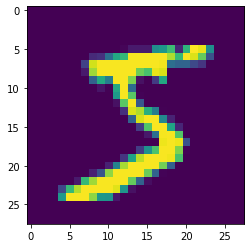

In [10]:
plt.imshow(single_image)

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_train.shape

(60000,)

In [13]:
y_cat_train = to_categorical(y_train,num_classes=10)

In [14]:
y_cat_test = to_categorical(y_test,num_classes=10)

In [15]:
x_train = x_train / 255
x_test = x_test / 255

In [16]:
scaled_image = x_train[0]

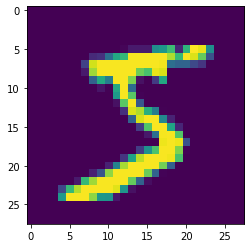

In [17]:
plt.imshow(scaled_image)

In [18]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [19]:
from tensorflow.keras.models import Sequential

In [20]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [21]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [22]:
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [24]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 9s 3ms/step - loss: 0.2706 - accuracy: 0.9214 - val_loss: 0.0570 - val_accuracy: 0.9817
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0463 - accuracy: 0.9857 - val_loss: 0.0482 - val_accuracy: 0.9837
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0296 - accuracy: 0.9901 - val_loss: 0.0426 - val_accuracy: 0.9867
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0198 - accuracy: 0.9937 - val_loss: 0.0363 - val_accuracy: 0.9893
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0124 - accuracy: 0.9962 - val_loss: 0.0409 - val_accuracy: 0.9877


In [25]:
metrics = pd.DataFrame(model.history.history)

<AxesSubplot:>

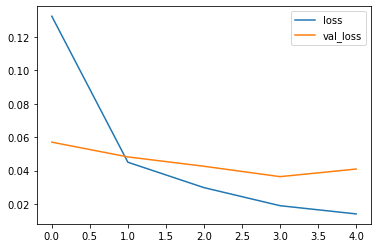

In [26]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

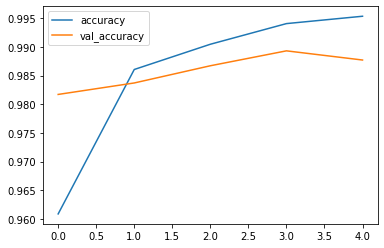

In [27]:
metrics[['accuracy','val_accuracy']].plot()

In [28]:
model.metrics_names

['loss', 'accuracy']

In [29]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.04089765623211861, 0.9876999855041504]

In [30]:
from sklearn.metrics import classification_report,confusion_matrix

In [31]:
predictions = np.argmax(model.predict(x_test), axis=-1)

In [32]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.98      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [33]:
confusion_matrix(y_test,predictions)

array([[ 979,    0,    0,    0,    0,    0,    1,    0,    0,    0],
       [   0, 1131,    1,    2,    0,    0,    1,    0,    0,    0],
       [   3,    0, 1023,    0,    0,    0,    2,    4,    0,    0],
       [   0,    0,    1, 1007,    0,    1,    0,    0,    1,    0],
       [   1,    0,    1,    0,  972,    0,    1,    0,    1,    6],
       [   2,    0,    0,    8,    0,  881,    1,    0,    0,    0],
       [   6,    2,    0,    0,    2,    2,  945,    0,    1,    0],
       [   0,    2,    7,    0,    0,    0,    0, 1016,    1,    2],
       [   9,    0,    5,    1,    0,    2,    3,    6,  945,    3],
       [   1,    2,    1,    4,    4,    8,    0,    6,    5,  978]],
      dtype=int64)

In [34]:
import seaborn as sns

<AxesSubplot:>

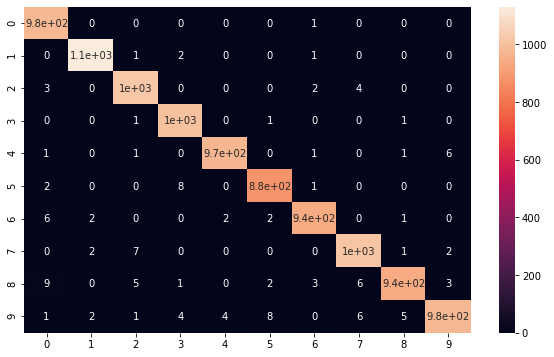

In [35]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [36]:
my_number = x_test[0]

In [37]:
my_number.shape

(28, 28, 1)

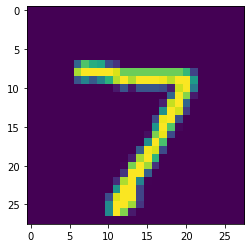

In [38]:
plt.imshow(my_number.reshape(28,28))

In [39]:
np.argmax(model.predict(my_number.reshape(1,28,28,1)), axis=-1)

array([7], dtype=int64)